In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import os

## Prepare data

In [16]:
data = pd.read_csv(os.path.join(os.getcwd(), 'iris.data'), names=['sepal_length', 'sepal_width', 'petal_length',
                                                                  'petal_width', 'class'])

In [17]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.19, random_state=3)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(102, 4) (24, 4) (24, 4)
(102,) (24,) (24,)


In [152]:
X_scaler = StandardScaler()
y_encoder = LabelEncoder()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)
y_encoder.fit(y_train)
y_train = to_categorical(y_encoder.transform(y_train))
y_val = to_categorical(y_encoder.transform(y_val))
y_test = to_categorical(y_encoder.transform(y_test))

In [153]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()

In [154]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Models

In [155]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(3, kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('softmax')
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [156]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_20 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 15        
_________________________________________________________________
activation_21 (Activation)   (None, 3)                 0         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [157]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

In [158]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 102 samples, validate on 24 samples
Epoch 1/1000
102/102 [==============================] - 1s 7ms/step - loss: 1.0196 - acc: 0.3333 - val_loss: 0.9455 - val_acc: 0.3750
Epoch 2/1000
102/102 [==============================] - 0s 89us/step - loss: 1.0105 - acc: 0.4020 - val_loss: 0.9365 - val_acc: 0.4583
Epoch 3/1000
102/102 [==============================] - 0s 147us/step - loss: 1.0016 - acc: 0.4216 - val_loss: 0.9283 - val_acc: 0.4167
Epoch 4/1000
102/102 [==============================] - 0s 134us/step - loss: 0.9935 - acc: 0.4510 - val_loss: 0.9204 - val_acc: 0.4167
Epoch 5/1000
102/102 [==============================] - 0s 169us/step - loss: 0.9849 - acc: 0.5000 - val_loss: 0.9129 - val_acc: 0.4167
Epoch 6/1000
102/102 [==============================] - 0s 177us/step - loss: 0.9773 - acc: 0.5196 - val_loss: 0.9057 - val_acc: 0.4583
Epoch 7/1000
102/102 [==============================] - 0s 175us/step - loss: 0.9693 - acc: 0.5784 - val_loss: 0.8992 - val_acc: 0.5417
Epoch 

102/102 [==============================] - 0s 139us/step - loss: 0.6983 - acc: 0.7843 - val_loss: 0.6969 - val_acc: 0.6667
Epoch 61/1000
102/102 [==============================] - 0s 117us/step - loss: 0.6943 - acc: 0.7843 - val_loss: 0.6944 - val_acc: 0.6667
Epoch 62/1000
102/102 [==============================] - 0s 134us/step - loss: 0.6905 - acc: 0.7843 - val_loss: 0.6919 - val_acc: 0.7083
Epoch 63/1000
102/102 [==============================] - 0s 108us/step - loss: 0.6868 - acc: 0.7843 - val_loss: 0.6895 - val_acc: 0.7083
Epoch 64/1000
102/102 [==============================] - 0s 116us/step - loss: 0.6830 - acc: 0.7843 - val_loss: 0.6872 - val_acc: 0.7083
Epoch 65/1000
102/102 [==============================] - 0s 130us/step - loss: 0.6792 - acc: 0.7843 - val_loss: 0.6848 - val_acc: 0.7083
Epoch 66/1000
102/102 [==============================] - 0s 146us/step - loss: 0.6755 - acc: 0.7843 - val_loss: 0.6827 - val_acc: 0.7083
Epoch 67/1000
102/102 [==============================] 

Epoch 120/1000
102/102 [==============================] - 0s 105us/step - loss: 0.5426 - acc: 0.8529 - val_loss: 0.5885 - val_acc: 0.7917
Epoch 121/1000
102/102 [==============================] - 0s 135us/step - loss: 0.5405 - acc: 0.8627 - val_loss: 0.5863 - val_acc: 0.7917
Epoch 122/1000
102/102 [==============================] - 0s 112us/step - loss: 0.5387 - acc: 0.8627 - val_loss: 0.5842 - val_acc: 0.7917
Epoch 123/1000
102/102 [==============================] - 0s 110us/step - loss: 0.5369 - acc: 0.8627 - val_loss: 0.5822 - val_acc: 0.7917
Epoch 124/1000
102/102 [==============================] - 0s 132us/step - loss: 0.5349 - acc: 0.8627 - val_loss: 0.5807 - val_acc: 0.8333
Epoch 125/1000
102/102 [==============================] - 0s 158us/step - loss: 0.5331 - acc: 0.8627 - val_loss: 0.5789 - val_acc: 0.8333
Epoch 126/1000
102/102 [==============================] - 0s 130us/step - loss: 0.5312 - acc: 0.8627 - val_loss: 0.5773 - val_acc: 0.8333
Epoch 127/1000
102/102 [==========

102/102 [==============================] - 0s 114us/step - loss: 0.4325 - acc: 0.8922 - val_loss: 0.4701 - val_acc: 0.8750
Epoch 180/1000
102/102 [==============================] - 0s 131us/step - loss: 0.4307 - acc: 0.9020 - val_loss: 0.4682 - val_acc: 0.9167
Epoch 181/1000
102/102 [==============================] - 0s 128us/step - loss: 0.4291 - acc: 0.9020 - val_loss: 0.4669 - val_acc: 0.9167
Epoch 182/1000
102/102 [==============================] - 0s 136us/step - loss: 0.4273 - acc: 0.9020 - val_loss: 0.4649 - val_acc: 0.9167
Epoch 183/1000
102/102 [==============================] - 0s 148us/step - loss: 0.4256 - acc: 0.9020 - val_loss: 0.4625 - val_acc: 0.9167
Epoch 184/1000
102/102 [==============================] - 0s 130us/step - loss: 0.4235 - acc: 0.9118 - val_loss: 0.4602 - val_acc: 0.9167
Epoch 185/1000
102/102 [==============================] - 0s 137us/step - loss: 0.4217 - acc: 0.9314 - val_loss: 0.4578 - val_acc: 0.9167
Epoch 186/1000
102/102 [=========================

102/102 [==============================] - 0s 94us/step - loss: 0.3493 - acc: 0.9608 - val_loss: 0.3835 - val_acc: 0.9167
Epoch 239/1000
102/102 [==============================] - 0s 104us/step - loss: 0.3482 - acc: 0.9608 - val_loss: 0.3819 - val_acc: 0.9167
Epoch 240/1000
102/102 [==============================] - 0s 130us/step - loss: 0.3472 - acc: 0.9608 - val_loss: 0.3811 - val_acc: 0.9167
Epoch 241/1000
102/102 [==============================] - 0s 140us/step - loss: 0.3461 - acc: 0.9706 - val_loss: 0.3801 - val_acc: 0.9167
Epoch 242/1000
102/102 [==============================] - 0s 106us/step - loss: 0.3451 - acc: 0.9706 - val_loss: 0.3789 - val_acc: 0.9167
Epoch 243/1000
102/102 [==============================] - 0s 97us/step - loss: 0.3441 - acc: 0.9706 - val_loss: 0.3776 - val_acc: 0.9167
Epoch 244/1000
102/102 [==============================] - 0s 152us/step - loss: 0.3432 - acc: 0.9706 - val_loss: 0.3765 - val_acc: 0.9167
Epoch 245/1000
102/102 [===========================

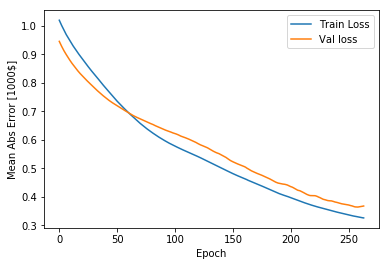

In [159]:
plot_history(history)

In [160]:
pred = np.round(model.predict(X_test).argmax(axis=1).reshape(-1,))
accuracy_score(pred, y_test.argmax(axis=1))

1.0

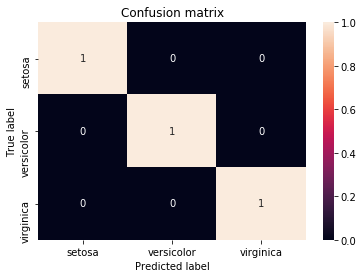

In [161]:
mat = confusion_matrix(pred, y_test.argmax(axis=1))
cm = mat / np.sum(mat, axis=1)
plot_confusion_matrix(cm, classes=['setosa', 'versicolor', 'virginica'])

In [162]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [163]:
weights = model.get_weights()
np.save('relu_weights', weights, allow_pickle=True)